# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

This is the salary prediction project; we predict the salary based on the job descriptions.
We are going to make a model.
If we obtain a new job description, we can predict the salary for this new job with using this model.

In [3]:
#import the libraries we use
import pandas as pd
import sklearn as sk
import numpy as np

#my info here
__author__ = "Tomo Shimo"
__email__ = "tomo.krmr@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [4]:
#load the data into a Pandas dataframe
csv_path_1 = '~/Documents/Study/DSDJ/Instructions_and_Notebook/data/train_features.csv'
df_features = pd.read_csv(csv_path_1)
df_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [5]:
csv_path_2 = '~/Documents/Study/DSDJ/Instructions_and_Notebook/data/train_salaries.csv'
df_salaries = pd.read_csv(csv_path_2)
df_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


### ---- 3 Clean the data ----

In [6]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
print(df_features.isna().sum())

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [7]:
df_salaries.query('salary <= 0')

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


In [8]:
df_salaries_mod = df_salaries.query('salary > 0')

In [9]:
df = pd.merge(df_salaries_mod, df_features, how="inner" ,on="jobId")

### ---- 4 Explore the data (EDA) ----

## Numerical features

In [10]:
#summarize each feature variable
df.describe()

,salary,yearsExperience,milesFromMetropolis
count,999995.000000,999995.000000,999995.000000
mean,116.062398,11.992407,49.529381
std,38.717163,7.212390,28.877721
min,17.000000,0.000000,0.000000
25%,88.000000,6.000000,25.000000
50%,114.000000,12.000000,50.000000
75%,141.000000,18.000000,75.000000
max,301.000000,24.000000,99.000000


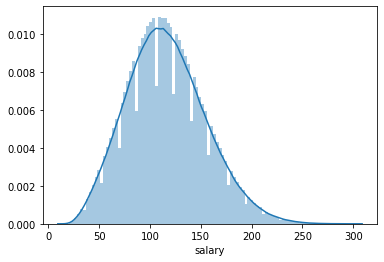

In [11]:
#summarize each feature variable
#summarize the target variable
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df_salaries_mod['salary'], 100,"salary", "Distribution of salary")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c9bd790>,
      dtype=object)

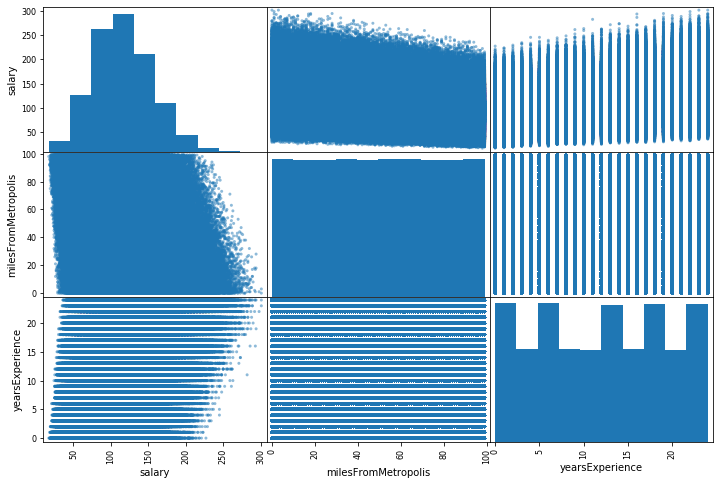

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["salary","milesFromMetropolis","yearsExperience"]
scatter_matrix(df[attributes], figsize=(12,8))

In [13]:
#look for correlation between each feature and the target
#look for correlation between features
df.corr()

,salary,yearsExperience,milesFromMetropolis
salary,1.000000,0.375013,-0.297686
yearsExperience,0.375013,1.000000,0.000672
milesFromMetropolis,-0.297686,0.000672,1.000000


From this correlation table, salary is positively correlated with years of experience and negatively correlated with miles from metropolis.

## Categorical features

[Text(0, 0, 'CFO'),
 Text(0, 0, 'CEO'),
 Text(0, 0, 'VICE_PRESIDENT'),
 Text(0, 0, 'MANAGER'),
 Text(0, 0, 'JUNIOR'),
 Text(0, 0, 'JANITOR'),
 Text(0, 0, 'CTO'),
 Text(0, 0, 'SENIOR')]

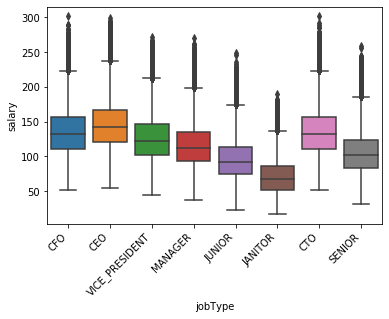

In [80]:
chart = sns.boxplot(x="jobType", y="salary", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

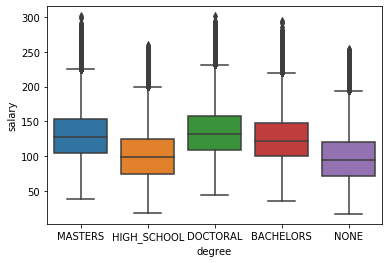

In [15]:
sns.boxplot(x="degree", y="salary", data=df)

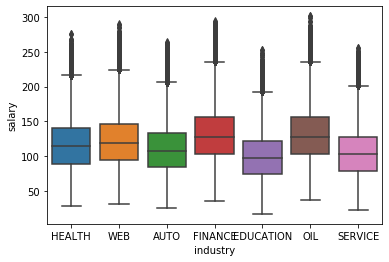

In [16]:
sns.boxplot(x="industry", y="salary", data=df)

In [17]:
df['companyId'].describe()

count     999995
unique        63
top       COMP39
freq       16193
Name: companyId, dtype: object

In [18]:
df_jobtype = df.groupby(['jobType'],as_index=False).mean()
df_jobtype

,jobType,salary,yearsExperience,milesFromMetropolis
0,CEO,145.311425,11.998269,49.478458
1,CFO,135.458547,11.990440,49.572715
2,CTO,135.481067,12.010860,49.580847
3,JANITOR,70.813045,11.969657,49.443815
4,JUNIOR,95.333087,11.992383,49.660508
5,MANAGER,115.368518,11.987284,49.498354
6,SENIOR,105.487775,11.996624,49.572558
7,VICE_PRESIDENT,125.368630,11.993700,49.428222


Text(0.5, 0, 'job type')

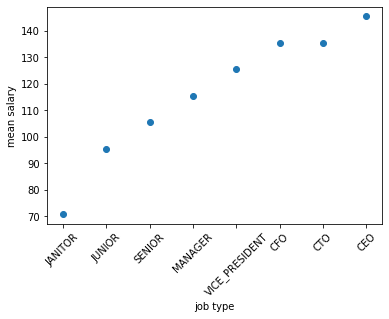

In [88]:
df_jobtype_sorted = df_jobtype.sort_values(by='salary')
plt.scatter(df_jobtype_sorted['jobType'],df_jobtype_sorted['salary'])
plt.xticks(rotation=45)
plt.ylabel('mean salary')
plt.xlabel('job type')

In [20]:
df_degree = df.groupby(['degree'],as_index=False).mean()
df_degree

,degree,salary,yearsExperience,milesFromMetropolis
0,BACHELORS,125.454663,11.986045,49.589646
1,DOCTORAL,135.490979,12.003279,49.609020
2,HIGH_SCHOOL,101.921085,11.995519,49.459310
3,MASTERS,130.505647,11.984987,49.554064
4,NONE,98.176882,11.991450,49.477600


Text(0.5, 0, 'degree')

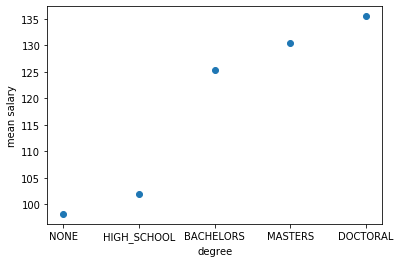

In [89]:
df_degree_sorted = df_degree.sort_values(by='salary')
plt.scatter(df_degree_sorted['degree'],df_degree_sorted['salary'])
plt.ylabel('mean salary')
plt.xlabel('degree')

In [22]:
df['major']

0              MATH
1              NONE
2           PHYSICS
3         CHEMISTRY
4           PHYSICS
            ...    
999990    CHEMISTRY
999991         NONE
999992         NONE
999993         NONE
999994         NONE
Name: major, Length: 999995, dtype: object

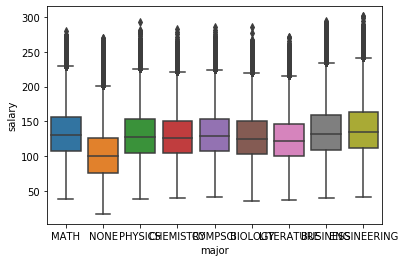

In [23]:
sns.boxplot(x="major", y="salary", data=df)

Text(0.5, 0, 'major')

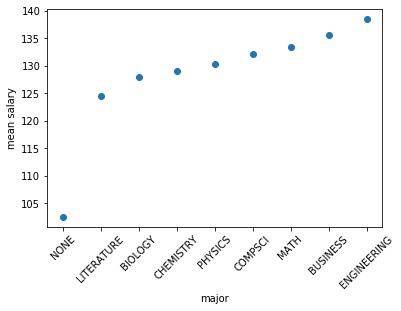

In [90]:
df_major = df.groupby(['major'],as_index=False).mean()
df_major_sorted = df_major.sort_values(by='salary')
plt.scatter(df_major_sorted['major'],df_major_sorted['salary'])
plt.xticks(rotation=45)
plt.ylabel('mean salary')
plt.xlabel('major')

In [25]:
print(len(df_major['major'] == "NONE"))

9


In [26]:
grouped_test1 = df.groupby(['jobType','degree'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='jobType',columns='degree')
grouped_pivot['salary']

degree,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE
jobType,,,,,
CEO,148.421009,158.232849,135.629182,153.254510,130.796690
CFO,138.508706,148.308742,125.964395,143.316243,121.135389
CTO,138.363172,148.269262,126.082232,143.582019,120.939193
JANITOR,NaN,NaN,70.976821,NaN,70.649575
JUNIOR,98.130267,108.356035,85.791986,103.463304,80.884064
MANAGER,118.173795,128.211800,106.068086,123.389176,100.981070
SENIOR,108.325539,118.867134,95.908637,113.408824,90.628738
VICE_PRESIDENT,128.196227,138.491400,115.758343,133.077062,111.207654


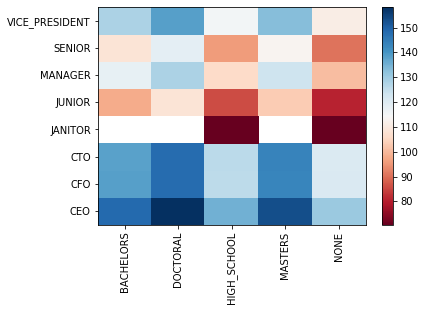

In [27]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot['salary'], cmap='RdBu')

#label names
row_labels = grouped_pivot['salary'].columns
col_labels = grouped_pivot['salary'].index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot['salary'].shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot['salary'].shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [28]:
grouped_test2 = df.groupby(['jobType','major'],as_index=False).mean()
grouped_pivot2 = grouped_test2.pivot(index='jobType',columns='major')
grouped_pivot2['salary']

major,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
jobType,,,,,,,,,
CEO,150.926273,158.532143,151.359351,154.864766,161.450760,147.303251,156.424772,135.019285,153.378811
CFO,141.007409,148.635337,142.025117,144.469856,151.962028,137.782555,145.532890,125.272393,143.207245
CTO,140.713955,148.044638,141.941086,145.131548,151.658217,137.066163,146.363081,125.358820,143.480062
JANITOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.813045,NaN
JUNIOR,100.662689,108.502700,101.723473,104.960541,111.307501,97.489962,106.217693,85.102551,103.265185
MANAGER,120.651605,128.233874,122.166586,124.679360,131.577487,116.761529,126.428692,105.322210,122.699763
SENIOR,110.628057,119.406469,112.464656,115.213126,121.240136,107.559342,116.055494,95.082839,113.446978
VICE_PRESIDENT,131.104973,138.329067,131.801589,134.490711,141.029169,127.653643,136.113320,115.303132,132.872443


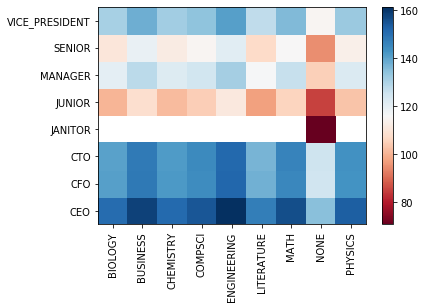

In [29]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2['salary'], cmap='RdBu')

#label names
row_labels = grouped_pivot2['salary'].columns
col_labels = grouped_pivot2['salary'].index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2['salary'].shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2['salary'].shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [30]:
df['companyId'].describe()

count     999995
unique        63
top       COMP39
freq       16193
Name: companyId, dtype: object

Text(0.5, 0, 'company id')

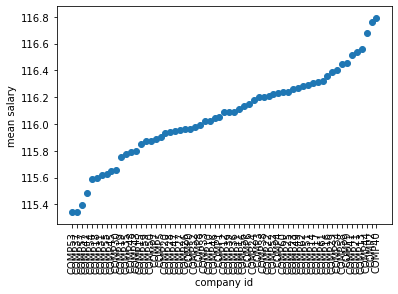

In [97]:
df_companies = df.groupby(['companyId'],as_index=False).mean()
df_companies_sorted = df_companies.sort_values(by='salary')
plt.scatter(df_companies_sorted['companyId'],df_companies_sorted['salary'])
plt.xticks(rotation=90)
plt.ylabel('mean salary')
plt.xlabel('company id')

Accoding to the means of categorical features, jobType and degrees are correlated with salary stronger than major and companyId.

### ---- 5 Establish a baseline ----

Aiming MSE < 360
At first, the salary considered to have a linear relationship with the years of experience.


In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['yearsExperience']],df['salary'])
print( "Salary = " + str(lm.coef_[0]) + " * yearsExperience + " + str(lm.intercept_))

Salary = 2.013126778161082 * yearsExperience + 91.9201627221139


In [33]:
y_hat = lm.coef_[0]* df[['yearsExperience']]+lm.intercept_
sk.metrics.mean_squared_error(y_hat,df['salary'])

1288.2028743217447

In [34]:
#during 5-fold cross-validation
Rcross = sk.model_selection.cross_val_score(lm,df[['yearsExperience']],df['salary'], cv=5)
Rcross

array([0.14132088, 0.14246846, 0.13849021, 0.13882048, 0.14201107])

In [35]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.14062221908143088 and the standard deviation is 0.001650294899680484


The MSE (Mean Squared Error) is 1288. 

### ---- 6 Hypothesize solution ----

## Model 1: Adding degree and jobtype as variables
I think the degree and jobtype are also the key to predict the salary. It's because the means of salary and degree depend on what they are.

I applied one-hot encoding to "jobType" and "degree".
Then I predict the relationship between salary with variables, which are years of experience, degree and jobtype.

## Model 2: Model1 + salary scaling
At first, scale saraly, then use model 1.
This is because the distribution of salary is skewed.

## Model 3: All the features without companyID
All the features without companyID are considered as linearly correlated with salary.

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

## Model 1

In [36]:
df_model1 = df[['salary','degree','jobType','yearsExperience']]

###  Transform categorical features into one-hot valiables

In [37]:
df_jobType_labels = df_model1[['jobType']]

In [38]:
from sklearn.preprocessing import LabelBinarizer
    
encoder = LabelBinarizer()
df_jobType_1hot = df_model1.join(pd.DataFrame(encoder.fit_transform(df_jobType_labels),
                          columns=encoder.classes_, 
                          index=df.index))


In [39]:
df_jobType_1hot = df_jobType_1hot.drop("jobType", axis=1)

In [40]:
df_degree_labels = df_model1[['degree']]

In [41]:
df_degree_1hot = df_jobType_1hot.join(pd.DataFrame(encoder.fit_transform(df_degree_labels),
                          columns=encoder.classes_, 
                          index=df.index))
df_degree_1hot = df_degree_1hot.drop("degree", axis=1)

In [42]:
target_model1 = df_degree_1hot['salary']
features_model1 = df_degree_1hot.drop("salary", axis=1)

In [43]:
target_model1

0         130
1         101
2         137
3         142
4         163
         ... 
999990     88
999991    160
999992     64
999993    149
999994     88
Name: salary, Length: 999995, dtype: int64

In [44]:
features_model1

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE
0,10,0,1,0,0,0,0,0,0,0,0,0,1,0
1,3,1,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,0,0,0,0,0,0,1,0,1,0,0,0
3,8,0,0,0,0,0,1,0,0,0,1,0,0,0
4,8,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,0,1,0,0
999992,16,0,0,0,0,1,0,0,0,0,0,1,0,0
999993,6,0,1,0,0,0,0,0,0,0,0,0,1,0


## Model 2

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
target_model2 = scaler.fit_transform(df_degree_1hot[['salary']])

In [47]:
target_model2

array([[ 0.35998527],
       [-0.38903692],
       [ 0.54078373],
       ...,
       [-1.34468592],
       [ 0.85072395],
       [-0.72480548]])

In [48]:
target_model2_inv = scaler.inverse_transform(target_model2)
target_model2_inv

array([[130.],
       [101.],
       [137.],
       ...,
       [ 64.],
       [149.],
       [ 88.]])

In [49]:
scaler.mean_

array([116.06239831])

In [50]:
scaler.scale_

array([38.71714403])

In [51]:
target_model2_df = pd.DataFrame(target_model2, index=df.index)
target_model2_df

,0
0,0.359985
1,-0.389037
2,0.540784
3,0.669925
4,1.212321
...,...
999990,-0.724805
999991,1.134836
999992,-1.344686
999993,0.850724


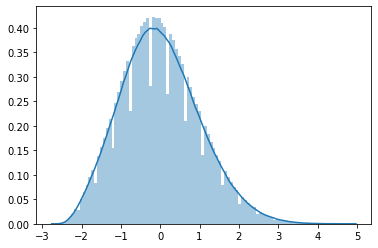

In [52]:
sns.distplot(target_model2_df, 100,"salary", "Distribution of salary")

mean = 0, std_dev = 1.0
=> outlier 1.5*2=3.0

In [53]:
print(len(target_model2[target_model2_df[0] > 3.0]))

3212


In [54]:
scaler.inverse_transform([3.0])

array([232.21383039])

Confirm how much is the mse between standarized one and original one

In [56]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(target_model1, target_model2_inv)
mse_test

9.26796290758549e-31

## Model 3

This didn't work well...

In [ ]:
# cat_attribs = ["major","industry", "jobType","degree"]

# from sklearn.base import BaseEstimator, TransformerMixin

# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

# from sklearn.pipeline import Pipeline
# cat_pipeline = Pipeline([
#     ('selector', DataFrameSelector(cat_attribs)),
#     ('label_binarizer', LabelBinarizer()),
# ])

# features_model3 = cat_pipeline.fit_transform(df_features)

In [57]:
features_model3 = features_model1.join(df[['milesFromMetropolis']])

In [58]:
features_model3

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE,milesFromMetropolis
0,10,0,1,0,0,0,0,0,0,0,0,0,1,0,83
1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,73
2,10,0,0,0,0,0,0,0,1,0,1,0,0,0,38
3,8,0,0,0,0,0,1,0,0,0,1,0,0,0,17
4,8,0,0,0,0,0,0,0,1,1,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,0,0,0,0,94
999991,12,0,0,1,0,0,0,0,0,0,0,1,0,0,35
999992,16,0,0,0,0,1,0,0,0,0,0,1,0,0,81
999993,6,0,1,0,0,0,0,0,0,0,0,0,1,0,5


### Transform categorical features into one-hot valiables

In [214]:
df_industry_labels = df[['industry']]
df_industry_labels

,industry
0,HEALTH
1,WEB
2,HEALTH
3,AUTO
4,FINANCE
...,...
999990,HEALTH
999991,FINANCE
999992,EDUCATION
999993,HEALTH


In [215]:
encoder3 = LabelBinarizer()
features_model3 = features_model3.join(pd.DataFrame(encoder3.fit_transform(df_industry_labels),
                          columns=encoder3.classes_, 
                          index=df.index))
features_model3

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,MASTERS,NONE,milesFromMetropolis,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,10,0,1,0,0,0,0,0,0,0,...,1,0,83,0,0,0,1,0,0,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,73,0,0,0,0,0,0,1
2,10,0,0,0,0,0,0,0,1,0,...,0,0,38,0,0,0,1,0,0,0
3,8,0,0,0,0,0,1,0,0,0,...,0,0,17,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,16,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,94,0,0,0,1,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,35,0,0,1,0,0,0,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,81,0,1,0,0,0,0,0
999993,6,0,1,0,0,0,0,0,0,0,...,1,0,5,0,0,0,1,0,0,0


In [216]:
df_major_labels = df[['major']]

In [219]:
features_model3 = features_model3.rename(columns={"NONE":"NONE_DEG"})

In [220]:
features_model3 = features_model3.join(pd.DataFrame(encoder3.fit_transform(df_major_labels),
                          columns=encoder3.classes_, 
                          index=df.index))
features_model3

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## For Turning Model 3

### dropping degree=none -> didn't work well

In [389]:
features_model4 = features_model3.drop("NONE_DEG", axis=1)

### categorized companyId by mean salary -> didn't work well

In [390]:
df_companies_sorted

,companyId,salary,yearsExperience,milesFromMetropolis,comp_cat
49,COMP53,115.342355,12.053753,49.402193,231.0
31,COMP37,115.345049,11.962905,49.367369,231.0
53,COMP57,115.393540,11.920243,49.864918,231.0
37,COMP42,115.484037,12.026469,49.936210,231.0
50,COMP54,115.589785,11.963135,49.633786,232.0
...,...,...,...,...,...
14,COMP21,116.539156,11.940498,49.746128,234.0
5,COMP13,116.561795,12.101968,49.674417,234.0
39,COMP44,116.680892,11.956886,49.195826,234.0
12,COMP2,116.759223,12.040087,49.782814,234.0


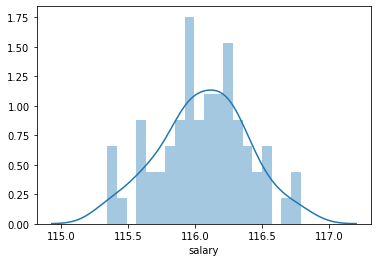

In [391]:
sns.distplot(df_companies_sorted['salary'], 20,"salary", "Distribution of salary")

In [267]:
df_companies_sorted["comp_cat"] = np.ceil(df_companies_sorted["salary"]/0.5)

In [268]:
df_companies_sorted

,companyId,salary,yearsExperience,milesFromMetropolis,comp_cat
49,COMP53,115.342355,12.053753,49.402193,231.0
31,COMP37,115.345049,11.962905,49.367369,231.0
53,COMP57,115.393540,11.920243,49.864918,231.0
37,COMP42,115.484037,12.026469,49.936210,231.0
50,COMP54,115.589785,11.963135,49.633786,232.0
...,...,...,...,...,...
14,COMP21,116.539156,11.940498,49.746128,234.0
5,COMP13,116.561795,12.101968,49.674417,234.0
39,COMP44,116.680892,11.956886,49.195826,234.0
12,COMP2,116.759223,12.040087,49.782814,234.0


In [272]:
df_companies_sorted["comp_cat"].describe()

count     63.000000
mean     232.603175
std        0.752194
min      231.000000
25%      232.000000
50%      233.000000
75%      233.000000
max      234.000000
Name: comp_cat, dtype: float64

In [278]:
df_companies_sorted["comp_cat"]

49    231.0
31    231.0
53    231.0
37    231.0
50    232.0
      ...  
14    234.0
5     234.0
39    234.0
12    234.0
35    234.0
Name: comp_cat, Length: 63, dtype: float64

In [310]:
features_model5 = features_model4.join(df["companyId"])
features_model5

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS,companyId
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,COMP37
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COMP19
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,COMP52
3,8,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COMP38
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,COMP7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,COMP56
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COMP24
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COMP23
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COMP3


In [290]:
comp_dict = df_companies_sorted[["companyId","comp_cat"]]
comp_dict

,companyId,comp_cat
49,COMP53,231.0
31,COMP37,231.0
53,COMP57,231.0
37,COMP42,231.0
50,COMP54,232.0
...,...,...
14,COMP21,234.0
5,COMP13,234.0
39,COMP44,234.0
12,COMP2,234.0


In [294]:
comp_dict = comp_dict.set_index('companyId')

In [295]:
comp_dict.to_dict()

{'comp_cat': {'COMP53': 231.0,
  'COMP37': 231.0,
  'COMP57': 231.0,
  'COMP42': 231.0,
  'COMP54': 232.0,
  'COMP18': 232.0,
  'COMP31': 232.0,
  'COMP55': 232.0,
  'COMP45': 232.0,
  'COMP30': 232.0,
  'COMP19': 232.0,
  'COMP35': 232.0,
  'COMP48': 232.0,
  'COMP43': 232.0,
  'COMP15': 232.0,
  'COMP59': 232.0,
  'COMP50': 232.0,
  'COMP7': 232.0,
  'COMP5': 232.0,
  'COMP20': 232.0,
  'COMP28': 232.0,
  'COMP47': 232.0,
  'COMP27': 232.0,
  'COMP26': 232.0,
  'COMP0': 232.0,
  'COMP32': 232.0,
  'COMP8': 232.0,
  'COMP33': 233.0,
  'COMP10': 233.0,
  'COMP46': 233.0,
  'COMP1': 233.0,
  'COMP12': 233.0,
  'COMP39': 233.0,
  'COMP36': 233.0,
  'COMP11': 233.0,
  'COMP56': 233.0,
  'COMP6': 233.0,
  'COMP24': 233.0,
  'COMP3': 233.0,
  'COMP38': 233.0,
  'COMP22': 233.0,
  'COMP52': 233.0,
  'COMP4': 233.0,
  'COMP60': 233.0,
  'COMP25': 233.0,
  'COMP23': 233.0,
  'COMP49': 233.0,
  'COMP62': 233.0,
  'COMP51': 233.0,
  'COMP14': 233.0,
  'COMP17': 233.0,
  'COMP61': 233.0,
  'COMP1

In [312]:
companyId_mapped = features_model5["companyId"].map(comp_dict["comp_cat"])
companyId_mapped

0         231.0
1         232.0
2         233.0
3         233.0
4         232.0
          ...  
999990    233.0
999991    233.0
999992    233.0
999993    233.0
999994    232.0
Name: companyId, Length: 999995, dtype: float64

In [319]:
features_model5 = features_model5.rename(columns={"companyId":"companyId_"})
features_model5 = features_model5.join(companyId_mapped)
features_model5 = features_model5.drop("companyId_", axis=1)
features_model5

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS,companyId
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,231.0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,232.0
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,233.0
3,8,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,233.0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,233.0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,233.0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,233.0
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,233.0


### replace companyId by its mean salary -> didn't work well

In [337]:
comp_sal_dict = df_companies_sorted[["companyId","salary"]]
comp_sal_dict

,companyId,salary
49,COMP53,115.342355
31,COMP37,115.345049
53,COMP57,115.393540
37,COMP42,115.484037
50,COMP54,115.589785
...,...,...
14,COMP21,116.539156
5,COMP13,116.561795
39,COMP44,116.680892
12,COMP2,116.759223


In [338]:
comp_sal_dict = comp_sal_dict.set_index('companyId')
comp_sal_dict

,salary
companyId,
COMP53,115.342355
COMP37,115.345049
COMP57,115.393540
COMP42,115.484037
COMP54,115.589785
...,...
COMP21,116.539156
COMP13,116.561795
COMP44,116.680892


In [339]:
comp_sal_dict.to_dict()

{'salary': {'COMP53': 115.34235547667343,
  'COMP37': 115.34504872681546,
  'COMP57': 115.39354013431404,
  'COMP42': 115.48403688138995,
  'COMP54': 115.58978531639231,
  'COMP18': 115.59716738735351,
  'COMP31': 115.62223914699162,
  'COMP55': 115.62370774402233,
  'COMP45': 115.64927444794952,
  'COMP30': 115.6594351973069,
  'COMP19': 115.7565484396541,
  'COMP35': 115.77466799056721,
  'COMP48': 115.79365976145637,
  'COMP43': 115.80006267627702,
  'COMP15': 115.84711653355134,
  'COMP59': 115.87016058757625,
  'COMP50': 115.87245899563042,
  'COMP7': 115.88850130018393,
  'COMP5': 115.9061906570452,
  'COMP20': 115.93419233186675,
  'COMP28': 115.94320628086615,
  'COMP47': 115.94878450240567,
  'COMP27': 115.95352818106892,
  'COMP26': 115.95968253968255,
  'COMP0': 115.96361547299885,
  'COMP32': 115.97437022183232,
  'COMP8': 115.98964061900499,
  'COMP33': 116.01961901145498,
  'COMP10': 116.0198001131435,
  'COMP46': 116.0437151625227,
  'COMP1': 116.04860935524653,
  'COMP1

In [331]:
features_model6 = features_model4.join(df["companyId"])
features_model6

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS,companyId
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,COMP37
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COMP19
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,COMP52
3,8,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COMP38
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,COMP7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,COMP56
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COMP24
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COMP23
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COMP3


In [340]:
companyId_sal_mapped = features_model6["companyId"].map(comp_sal_dict["salary"])
companyId_sal_mapped

0         115.345049
1         115.756548
2         116.224249
3         116.199380
4         115.888501
             ...    
999990    116.134865
999991    116.176489
999992    116.261277
999993    116.199339
999994    115.870161
Name: companyId, Length: 999995, dtype: float64

In [342]:
features_model6 = features_model6.rename(columns={"companyId":"companyId_"})
features_model6 = features_model6.join(companyId_sal_mapped)
features_model6 = features_model6.drop("companyId_", axis=1)
features_model6

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS,companyId
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,115.345049
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,115.756548
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,116.224249
3,8,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,116.199380
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,115.888501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,116.134865
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,116.176489
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,116.261277
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,116.199339


### ---- 8 Create models ----

## Model 1

In [135]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(features_model1, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
some_data = features_model1.iloc[:5]

In [100]:
some_labels=target_model1.iloc[:5]

In [104]:
print("Predictions:\t",lin_reg.predict(some_data))

Predictions:	 [139.4543457  117.06103516 134.34387207 120.3515625  120.26818848]


In [105]:
print("Labels:\t\t",list(some_labels))

Labels:		 [130, 101, 137, 142, 163]


In [136]:
from sklearn.metrics import mean_squared_error
model1_predictions = lin_reg.predict(features_model1)
lin_mse = mean_squared_error(target_model1, model1_predictions)
lin_mse

659.8062166537887

## Model 2

In [153]:
lin_reg2 = LinearRegression()
lin_reg2.fit(features_model1, target_model2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
model2_predictions = lin_reg2.predict(features_model1)
model2_predictions_inv = scaler.inverse_transform(model2_predictions)
lin_mse2 = mean_squared_error(target_model1, model2_predictions_inv)
lin_mse2

659.8062242189321

In [158]:
model2_predictions

array([[ 0.60417938],
       [ 0.02579498],
       [ 0.47218704],
       ...,
       [-0.58901215],
       [ 0.39651489],
       [-0.04396439]])

In [159]:
model2_predictions_inv 

array([[139.45449848],
       [117.06110638],
       [134.34413203],
       ...,
       [ 93.25753022],
       [131.41432252],
       [114.36022285]])

## Model 3

In [221]:
lin_reg3 = LinearRegression()
lin_reg3.fit(features_model3, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
model3_predictions = lin_reg3.predict(features_model3)
lin_mse3 = mean_squared_error(target_model1, model3_predictions)
lin_mse3

384.38026432578107

The MSE of model 3 is now 384. This is the best score.

In [378]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(target_model1, model3_predictions)
mae

15.843779757568374

In [381]:
np.sqrt(lin_mse3)/mae

1.237433143018397

## For Tuning Model 3

In [395]:
lin_reg4 = LinearRegression()
lin_reg4.fit(features_model4, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [397]:
model4_predictions = lin_reg4.predict(features_model4)
lin_mse4 = mean_squared_error(target_model1, model4_predictions)
lin_mse4

384.38026419140584

In [317]:
lin_reg5 = LinearRegression()
lin_reg5.fit(features_model5, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [318]:
model5_predictions = lin_reg5.predict(features_model5)
lin_mse5 = mean_squared_error(target_model1, model5_predictions)
lin_mse5

384.3702470214791

In [343]:
lin_reg6 = LinearRegression()
lin_reg6.fit(features_model6, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [344]:
model6_predictions = lin_reg6.predict(features_model6)
lin_mse6 = mean_squared_error(target_model1, model6_predictions)
lin_mse6

384.37020738888776

In [385]:
lin_reg8 = LinearRegression()
lin_reg8.fit(features_model8, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [386]:
model8_predictions = lin_reg8.predict(features_model8)
lin_mse8 = mean_squared_error(target_model1, model8_predictions)
lin_mse8

594.5524701883962

### Using PowerTransformer to salary -> didn't work well

In [75]:
from sklearn.preprocessing import PowerTransformer
ptf = PowerTransformer()
target_log_salary = ptf.fit_transform(df[['salary']])

In [77]:
features_model3 = features_model3.drop('job_deg', axis=1)
lin_reg10 = LinearRegression()
lin_reg10.fit(features_model3, target_log_salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
model10_predictions_log = lin_reg10.predict(features_model3)
model10_predictions=ptf.inverse_transform(model10_predictions_log)

In [79]:
lin_mse10 = mean_squared_error(target_model1, model10_predictions)
lin_mse10

525.725136891594

### Removing outliers -> didn't work well

In [362]:
df_model3_mod = features_model3.join(target_model1)
df_model3_mod = df_model3_mod [df_model3_mod['salary']<232.1]

In [363]:
target_model3_mod = df_model3_mod['salary']
features_model3_mod = df_model3_mod.drop("salary",axis=1)

In [369]:
features_model3_mod

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [401]:
lin_reg7 = LinearRegression()
lin_reg7.fit(features_model3_mod, target_model3_mod)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
model7_predictions = lin_reg7.predict(features_model3)
lin_mse7 = mean_squared_error(target_model1, model7_predictions)
lin_mse7

384.6223952427876

## Random Forest

In [323]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(features_model3, target_model1)
predictions_model3_random = forest_reg.predict(features_model3)
forest_mse = mean_squared_error(target_model1, predictions_model3_random)

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [324]:
forest_mse

134.95122092262267

In [375]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(forest_mse)

Scores: 134.95122092262267
Mean: 134.95122092262267
Standard deviation: 0.0


In [106]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import cross_val_score
# def get_score(n_estimators):
#     """Return the average MAE over 3 CV folds of random forest model.
    
#     Keyword argument:
#     n_estimators -- the number of trees in the forest
#     """
#     my_pipeline = Pipeline(steps=[
#     ('preprocessor', SimpleImputer()),
#     ('model', RandomForestRegressor(n_estimators, random_state=0))
#     ])
#     scores = -1 * cross_val_score(my_pipeline, features_model3, target_model1,
#                               cv=3,
#                               scoring='neg_mean_absolute_error')  
#     return scores.mean()

# results = {}
# number_trees = [50,100,150,200,250,300,350,400]
# for i in number_trees:
#     results[i] = get_score(i) 
    
# plt.plot(results.keys(), results.values())
# plt.show()

### Stochastic Gradient Descent

In [414]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None ,eta0=0.1)
sgd_reg.fit(features_model3,target_model1)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [417]:
predictions_model3_sgd = sgd_reg.predict(features_model3)
sgd_mse = mean_squared_error(target_model1, predictions_model3_sgd)
sgd_mse

1.6817611996012518e+22

### GradientBoosting

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(features_model3,target_model1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
predictions_model3_gbrt = gbrt.predict(features_model3)
gbrt_mse = mean_squared_error(target_model1, predictions_model3_gbrt)
gbrt_mse

736.7781428061008

In [103]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,10], 'n_estimators':[1,3, 10], 'learning_rate':[0.1,1.0]}
gbrt_gs = GradientBoostingRegressor()
gs = GridSearchCV(gbrt, parameters)

In [104]:
gs.fit(features_model3,target_model1)

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=1.0,
                                                 loss='ls', max_depth=2,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=3,
                                                 n_iter_no_change=None,
             

In [105]:
predictions_gs = gs.predict(features_model3)
gs_mse = mean_squared_error(target_model1, predictions_gs)
gs_mse

515.0923861477652

In [ ]:
### 

In [64]:
features_model3["job_deg"] = df['jobType'] +"_"+df['degree']

In [65]:
features_model3.head()

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE,milesFromMetropolis,job_deg
0,10,0,1,0,0,0,0,0,0,0,0,0,1,0,83,CFO_MASTERS
1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,73,CEO_HIGH_SCHOOL
2,10,0,0,0,0,0,0,0,1,0,1,0,0,0,38,VICE_PRESIDENT_DOCTORAL
3,8,0,0,0,0,0,1,0,0,0,1,0,0,0,17,MANAGER_DOCTORAL
4,8,0,0,0,0,0,0,0,1,1,0,0,0,0,16,VICE_PRESIDENT_BACHELORS


In [66]:
encoder = LabelBinarizer()
df_jobdeg_1hot = features_model3.join(pd.DataFrame(encoder.fit_transform(features_model3["job_deg"]),
                          columns=encoder.classes_, 
                          index=df.index))

In [73]:
df_jobdeg_1hot= df_jobdeg_1hot.drop("job_deg", axis=1)

In [74]:
lin_reg9 = LinearRegression()
lin_reg9.fit(df_jobdeg_1hot, target_model1)
model9_predictions = lin_reg9.predict(df_jobdeg_1hot)
lin_mse9 = mean_squared_error(target_model1, model9_predictions)
lin_mse9

525.8276090832443

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

In [405]:
Rcross3 = sk.model_selection.cross_val_score(lin_reg3,features_model3,target_model1, cv=5,scoring='neg_mean_squared_error')
Rcross3

array([-386.30917173, -385.19183317, -385.99246987, -382.57079642,
       -382.00745833])

In [372]:
display_scores(Rcross3)

Scores: [0.74292573 0.74358062 0.74314533 0.74396891 0.74415407]
Mean: 0.7435549329385215
Standard deviation: 0.0004679036282042437


In [327]:
Rcross3_random = sk.model_selection.cross_val_score(forest_reg,features_model3,target_model1, cv=5)
Rcross3_random

array([0.68816648, 0.68870888, 0.68820546, 0.68795427, 0.68855794])

In [ ]:
Rcross3_random_mse = sk.model_selection.cross_val_score(forest_reg,features_model3,target_model1, cv=5,scoring='neg_mean_squared_error')
Rcross3_random_mse

In [373]:
display_scores(Rcross3_random)

Scores: [0.68816648 0.68870888 0.68820546 0.68795427 0.68855794]
Mean: 0.68831860765828
Standard deviation: 0.0002750546056104389


In [368]:
Rcross7 = sk.model_selection.cross_val_score(lin_reg7,features_model3,target_model1, cv=5)
Rcross7

array([0.74292573, 0.74358062, 0.74314533, 0.74396891, 0.74415407])

In [226]:
# Caluculate MSE
y_hat_model3=lin_reg3.predict(features_model3)

sk.metrics.mean_squared_error(y_hat_model3,target_model1)

384.38026432578107

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data